# MTH9875 Homework 2

### ShengQuan Zhou

Assigned: September 6, 2018.
Due: September 20, 2018 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### The  volatility smile in a simple regime-switching model

#### 1. (10 points) 

Consider the simple regime-switching model from Lecture 2 where realized volatility over a one-year period can be either $10\%$ or $30\%$, each with probability $1/2$ (depending on an initial coin toss say).  The density of 1-year returns is given by the sum of the two corresponding normal densities (the forward price is equal to the spot price in each regime):


In [1]:
d3010 <- function(x){(dnorm(x,mean=-.1^2/2,sd=.1)+dnorm(x,mean=-.3^2/2,sd=.3))/2}

The following snippet loads Black-Scholes functions from Lecture 1.  Please use these in your solution.

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2015/09/9875HW2.zip", destfile="9875HW2.zip")
unzip(zipfile="9875HW2.zip")

source("BlackScholes.R")

In [3]:
library(repr)
options(repr.plot.height=5)

(a) Code a function to return the price of a 1-year European option with log-strike $k$ in this model.  Your function should return the price as a fraction of the current stock price.

(b) Code a function to return the implied volatility 1-year European option with log-strike $k$ in this model.

(c) Draw the 1-year volatility smile in this model for log-strikes from -$2.0$ to $2.0$ with implied volatility on the y-axis and log-strike on the x-axis.  

(d) What is implied volatility at-the-money?  Give intuition as to why.

(e) In the extreme wings of the volatility smile, implied volatility tends to $30\%$.  Why?

### Solution (a)

In [4]:
EuropeanCallOptionPrice<-function(logk)
{
    return (0.5*BSFormula(1,exp(logk),1,0,0.1)+0.5*BSFormula(1,exp(logk),1,0,0.3))
}

### Solution (b)

In [5]:
EuropeanCallOptionImpliedVolatility<-function(logk)
{
    CallPrice = EuropeanCallOptionPrice(logk)
    return (BSImpliedVolCall(1, exp(logk), 1, 0, CallPrice))
}

### Solution (c)

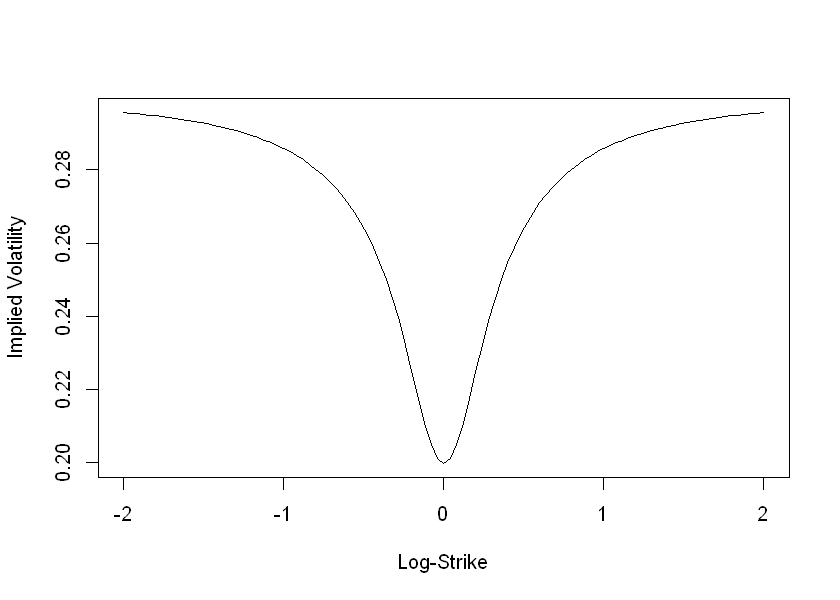

In [6]:
curve(EuropeanCallOptionImpliedVolatility(x),from=-2.0,to=2.0,xlab="Log-Strike",ylab="Implied Volatility")

### Solution (d)

Because the call price is superposition of the form
$$
C = \frac{1}{2}C_{\sigma_1} + \frac{1}{2}C_{\sigma 2}
$$
and the at-the-money call price 
$$
C_{\text{ATM}} \approx \sqrt{\frac{T}{2\pi}} \sigma S
$$
is approximately linear in terms of the volatility, we expect that
$$
\sigma_{\text{ATM}} \approx \frac{1}{2}\sigma_1 + \frac{1}{2}\sigma_2 = 20\%.
$$

In [7]:
AtmImpliedVolatility = EuropeanCallOptionImpliedVolatility(0)
cat("Implied volatility at-the-money =", round(AtmImpliedVolatility,6))

Implied volatility at-the-money = 0.19975

### Solution (e)

It is a known result that for extreme strikes (See Lingjiong Zhu, Options with Extreme Strikes, Risks 2015, 3, 234-249)

$$
C(K\rightarrow\infty) \approx \text{ATM Price}\times e^{-\frac{d_+^2}{2}},\\
P(K\rightarrow 0)\approx \text{ATM Price}\times e^{-\frac{d_+^2}{2}},
$$
where
$$
d_\pm = \frac{\log\frac{S_0}{K} \pm \frac{1}{2}\sigma^2 T}{\sigma T}.
$$
Thus, for $K\rightarrow \infty$, the term $\log\frac{S_0}{K}$ in the numerator of $d_\pm$ donimates. Thus, the smaller the volatility $\sigma$, the smaller in magnitude for the factor $e^{-\frac{1}{2}d_+^2}$. In other words, when a mixture of two volatilities exist, the compnent with the smaller volatlity vanishes more quickly as the strike goes to infinity. In our example, as $K\rightarrow \infty$, the call price in the regime-switching model is simply proportional to the Black-Scholes price with the higher volatility:
$$
C = \frac{1}{2}C_{\sigma_1 = 10\%} + \frac{1}{2}C_{\sigma_2 = 30\%} \approx \frac{1}{2}C_{\sigma_2 = 30\%}.
$$
Thus, in the extreme wings of the volatility smile, implied volatility tends to 30%. The same argument applies for $K\rightarrow 0$ for put options (or use put-call parity with call options).

### Tanaka's formula
$$\newcommand{\supp}{\mathrm{supp}}
\newcommand{\EE}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
#### 2. (6 points)

By applying Itô's lemma as in the notes, prove Tanaka's formula in its usual form:

$$
\left|B_t\right|=\int_0^t\,\sgn(B_s)\,dB_s+L_t
$$
where $B_t$ is a standard Brownian motion, $\sgn$ denotes the sign function

$$
\sgn(x)=\left\{
\begin{array}{ll}
  +1&x \ge 0  \\
 -1 & x <0 
\end{array}
\right.
$$

and $L_t$ is its local time at $0$ (roughly the time spent by $B$ at $0$ before time $t$) given by the formal expression

$$
L_t=\int_0^t\,\delta(B_s)\,ds.
$$

Explain in words what this result means in terms of delta-hedging of a particular options position.


### Solution:

Apply Itô's lemma, let $f(x) = |x|$, then $\frac{\partial f}{\partial x} = \text{sgn}(x)$, $\frac{\partial^2 f}{\partial x^2} = 2\delta (x)$, thus,
$$
d|B_t| = df(B_t) = \frac{\partial f}{\partial x}\Big|_{x=B_t}dB_t + \frac{1}{2}\frac{\partial^2 f}{\partial x^2}\Big|_{x=B_t}dB_tdB_t = \text{sgn}(B_t)dB_t + \delta(B_t)dt.
$$
In integral form,
$$
|B_t| = \int_0^t \text{sgn}(B_s)dB_s + \int_0^t \delta(B_s)ds = \int_0^t \text{sgn}(B_s)dB_s + L_t.
$$

This result is closely related to the Stop-Loss-Start-Gain (SLSG) strategy: fix a price
level $K$, if the stock price $S_t$ at time $t$ rises from $< K$ to $\ge K$, then buy 1 share
immediately (SG); if $S_t$ drops from $\ge K$ to $< K$, then sell immediately the share
already hold, if any (SL); do nothing in other cases. The position process is $\Delta_t = \mathbb{1}_{B_t\ge 0}$.

Our example is a slight variation of the SLSG strategy. Consider $K=0$ and $S_t = B_t$. If $B_t$ at time $t$ rises from $<0$ to $\ge 0$, then take a long position in 1 share; if $B_t$ drops from $\ge 0$ to $<0$, then take a short position in 1 share. The process of stock positions is thus $\Delta_t = \text{sgn}(B_t)$, and $\int_0^t \text{sgn}(B_s)dB_s$ is the PnL process. If the local time term $L_t$ is absent, we would have $\int_0^t \text{sgn}(B_s)dB_s = |B_t| \ge 0$, which is always non-negative, corresponding to a dynamic arbitrage. However, the existence of the local time term causes this arbitrage argument to break down.

## Local volatility and implied volatility

#### 3. (6 points) 

Using the BBF formula, prove the well-known rule of thumb that the local volatility skew is roughly twice the implied volatility skew for short expirations.  Formally, for small $T$,

$$
\left.\partial_k \sigma(k,T)\right|_{k=0} \approx 2\, \left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}.
$$

### Solution:

BBF formulat for small $T$, suppress the second argument in $\sigma(k,\cdot)$ for brevity,
$$\frac{1}{\sigma_{BS}(k)}=\frac{1}{k}\,\int_0^k\,\frac{dy}{\sigma(y)}=\int_0^1\,\frac{d\alpha}{\sigma(\alpha\,k)}.$$
Firstly, as $k\rightarrow 0$, $\sigma(k\rightarrow 0)$ is regular. Thus,
$$
\frac{1}{\sigma_{BS}(k)} \approx \frac{1}{k}\frac{1}{\sigma(k)}\int_0^k dy = \frac{1}{k}\frac{k}{\sigma(k)} = \frac{1}{\sigma(k)} \Rightarrow \sigma_{BS}(k)\big|_{k=0}\approx \sigma(k)\big|_{k=0}.
$$
Thus,
$$
\partial_k \sigma_{BS}(k) = \partial_k \left( \int_0^1\,\frac{d\alpha}{\sigma(\alpha k)} \right)^{-1}
 = \left( \int_0^1\,\frac{d\alpha}{\sigma(\alpha k)} \right)^{-2} \int_0^1 \frac{d\alpha}{\sigma^2(\alpha k)}\frac{\partial \sigma(\alpha k)}{\partial k} = \sigma^2_{BS}(k)\int_0^1 \frac{d\alpha}{\sigma^2(\alpha k)}\frac{\partial \sigma(\alpha k)}{\partial k}  = \frac{\sigma^2_{BS}(k)}{k}\int_0^k \frac{dy}{\sigma^2(y)}\frac{\partial \sigma(y)}{\partial y} \frac{y}{k}.
$$
Similarly, as $k\rightarrow 0$, assuming $\lim_{k\rightarrow 0}\partial_k\sigma(k)$ is also regular,
$$
\partial_k \sigma_{BS}(k)\big|_{k=0} \approx \lim_{k\rightarrow 0} \frac{\sigma^2_{BS}(k)}{k^2}\frac{1}{\sigma^2(k)}\partial_k \sigma(k)\int_0^k ydy = \lim_{k\rightarrow 0} \frac{\sigma^2_{BS}(k)}{k^2}\frac{1}{\sigma^2(k)}\partial_k \sigma(k)\frac{k^2}{2}
= \frac{1}{2} \partial_k \sigma(k)\big|_{k=0}.
$$
In other words,
$$
\partial_k \sigma(k)\big|_{k=0} = 2\partial_k \sigma_{BS}(k)\big|_{k=0}.
$$

#### 4. (6 points) 

Consider formula (12) from Lecture 2:

$$
v_\ell(k,T) = \frac{\frac{\partial w}{\partial T}}
{\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }}.
$$

Using this formula, show that the simple quadratic parameterization

$$
w(k,T)=\alpha(T)+\beta(T)\,{k}+\gamma(T)\,{k^2}
$$

with $\alpha(T)>0$ and $\gamma(T)>0$ is arbitrageable.  Explain your result in words in terms of option strategies.

### Solution:

Plug in the denominator and differentiate,
\begin{eqnarray}
&&\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }\\
&=& \left[1 -\frac 12\frac{k (\beta + 2\gamma k)  }{\alpha + \beta k + \gamma k^2}  \right]^2
- \frac14\,\left( \frac{1}{4} + \frac{1}{ \alpha + \beta k + \gamma k^2 } \right) (\beta + 2\gamma k)^2 + \gamma\\
(\text{As } k\rightarrow \infty) &\approx & \left[ \underbrace{1-\frac{1}{2}\frac{2\gamma k^2}{\gamma k^2}}_{=0} + O\left(\frac{1}{k}\right)\right]^2 - \frac{1}{4}\gamma^2 k^2 - \frac{1}{4}\beta\gamma k - \frac{1}{16}\beta^2 + O\left(\frac{1}{k^2}\right)+\gamma \\
&=& - \frac{1}{4}\gamma^2 k^2 - \frac{1}{4}\beta\gamma k + \gamma - \frac{1}{16}\beta^2 + O\left(\frac{1}{k^2}\right)\\
&<& 0, \quad \text{ for sufficiently large }k.
\end{eqnarray}
This violates the positivity condition for $v_\ell(k,T)$, indicating that the volatility surface is arbitrageable. The option strategy to implement this arbitrage is called butterfly because the denominator of $v_\ell(k,T)$ corresponds to $\frac{\partial^2 C}{\partial K^2}$ in Dupire formula.
